# Análise da representatividade feminina nos parlamenos.

## Para a análise feita nessa avaliação, a dupla decidiu coletar dados relacionados ao objetivo da ONU de equidade entre gêneros. 

 É evidente que a representatividade feminina em posições de liderança reflete uma sociedade que preza pela igualdade de gênero, pois com uma presença majoritariamente masculina seriam tomadas decisões que não representariam um outro grupo. 

 Dada a importância dessa diversidade, reunimos dados do world bank que analisam a porcentagem de mulheres nos parlamentos dos países Brasil, Islândia e Haiti. Segundo o jornal ElPaís, a Islândia é um país de referência em igualdade de gênero e o Haiti o extremo oposto, notamos que mesmo em países como a Islândia o crescimento foi pouco e ainda assim não se aproxima a 50% de representatividade no parlamento.

 Referência:
   -https://brasil.elpais.com/sociedade/2021-03-31/pandemia-adia-igualdade-de-genero-por-mais-uma-geracao.html

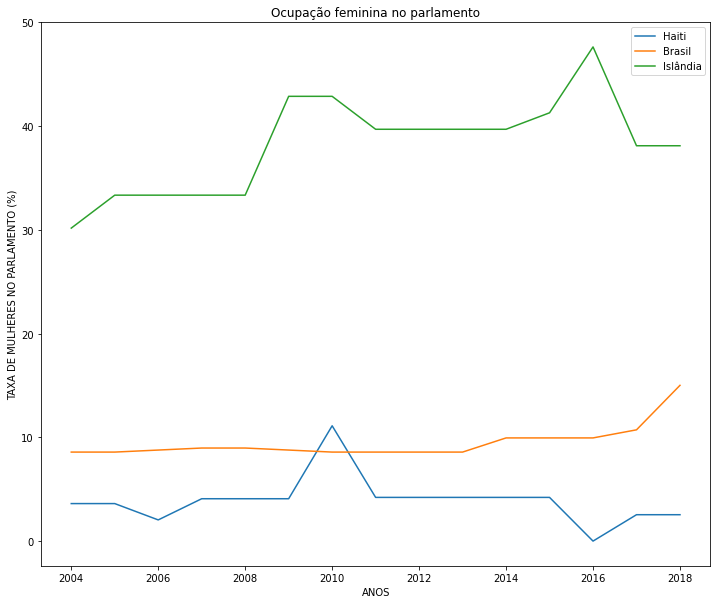

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 


df = pd.read_csv('data/API_SG.GEN.PARL.ZS_DS2_en_csv_v2_4413582/API_SG.GEN.PARL.ZS_DS2_en_csv_v2_4413582.csv', skiprows = 4)

anos_str = [str(i) for i in range(2004, 2019)]
anos = [i for i in range(2004, 2019)]

filtro_haiti = df['Country Name'] == 'Haiti'
filtro_br = df['Country Name'] == 'Brazil'
filtro_islandia = df['Country Name'] == 'Iceland'

df_brasil = df[filtro_br]
df_haiti = df[filtro_haiti]
df_noruga = df[filtro_islandia]

taxa_de_mulheres_no_parlamento_do_haiti = df_haiti[anos_str].mean()
taxa_de_mulheres_no_parlamento_do_brasil = df_brasil[anos_str].mean()
taxa_de_mulheres_no_parlamento_da_islandia = df_noruga[anos_str].mean()


plt.figure(figsize=(12,10))
plt.plot(anos, taxa_de_mulheres_no_parlamento_do_haiti)
plt.plot(anos,taxa_de_mulheres_no_parlamento_do_brasil)
plt.plot(anos,taxa_de_mulheres_no_parlamento_da_islandia)
plt.legend(['Haiti', 'Brasil', 'Islândia'])
plt.xlabel("ANOS")
plt.ylabel("TAXA DE MULHERES NO PARLAMENTO (%)")
plt.title('Ocupação feminina no parlamento')
plt.show()



## Análise da relação entre mulheres exercendo funções trabalhistas e a representatividade no parlamento

Em 2018, o Banco Mundial divulgou o relatório Perda de Oportunidades: o elevado custo de não educar as meninas. 
Tal relatório fomentava que a falta de igualdade de gênero traz consigo um grande prejuízo financeiro mundial. 
Por outro lado, focar em questões de gênero e igualdade aumentaria a possibilidade de mulheres participarem integralmente da sociedade e ser membros ativos das suas comunidades, principalmente no mercado de trabalho.
Por isso, o objetivo dessa comparação é observar se uma presença maior de mulheres no parlamento(indicando maior igualdade de gênero nas decisões da sociedade) poderia trazer como consequência uma maior participação das mulheres no mercado de trabalho.




A idéia é traçar correlações entre os gráficos de participação feminina no parlamento e o de inclusão no mercado de trabalho das mulheres.

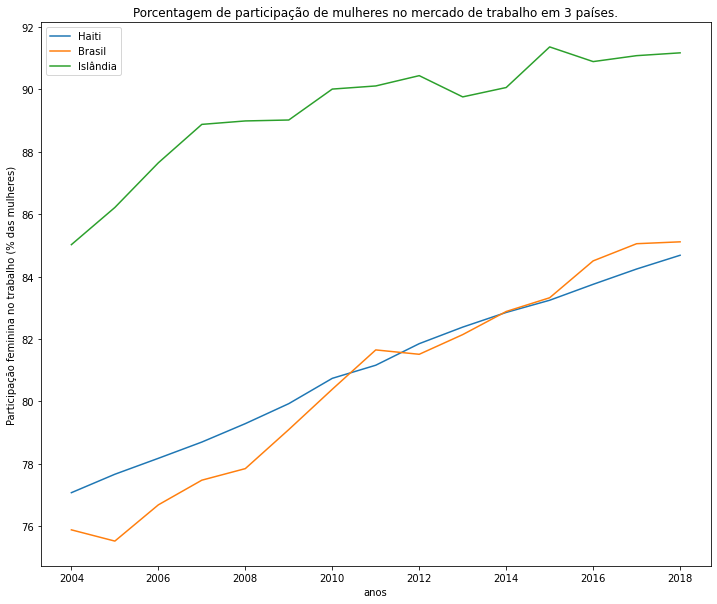

In [2]:
df_servicos = pd.read_csv('data/API_SL.SRV.EMPL.FE.ZS_DS2_en_csv_v2_4354717.csv', skiprows = 4)
df_servicos.head()

filtro_haiti = df['Country Name'] == 'Haiti'
filtro_br = df['Country Name'] == 'Brazil'
filtro_islandia = df['Country Name'] == 'Iceland'

df_brasil_servicos = df_servicos[filtro_br]
df_haiti_servicos = df_servicos[filtro_haiti]
df_noruga_servicos = df_servicos[filtro_islandia]


taxa_servicos_haiti = df_haiti_servicos[anos_str].mean()
taxa_servicos_brasil = df_brasil_servicos[anos_str].mean()
taxa_servicos_islandia = df_noruga_servicos[anos_str].mean()
plt.figure(figsize=(12,10))
plt.plot(anos, taxa_servicos_haiti)
plt.plot(anos,taxa_servicos_brasil)
plt.plot(anos,taxa_servicos_islandia)
plt.legend(['Haiti', 'Brasil', 'Islândia'])
plt.xlabel("anos")
plt.ylabel("Participação feminina no trabalho (% das mulheres)")
plt.title('Porcentagem de participação de mulheres no mercado de trabalho em 3 países.')
plt.show()



In [3]:
#Correlação
concat_haiti = pd.concat((taxa_de_mulheres_no_parlamento_do_haiti, taxa_servicos_haiti), join='inner', axis=1)
concat_islandia = pd.concat((taxa_de_mulheres_no_parlamento_da_islandia, taxa_servicos_islandia), join='inner', axis=1)
concat_brasil = pd.concat((taxa_de_mulheres_no_parlamento_do_brasil, taxa_servicos_brasil), join='inner', axis=1)
correlacao_islandia = concat_islandia.corr()[1][0]
correlacao_haiti = concat_haiti.corr()[1][0]
correlacao_brasil = concat_brasil.corr()[1][0]

covariancia_islandia = concat_islandia.cov()[1][0]
covariancia_brasil = concat_brasil.cov()[1][0]
covariancia_haiti =  concat_haiti.cov()[1][0]
print(f'A correlação de cada país é: Brasil: {correlacao_brasil}, Haiti:{correlacao_haiti}, Islandia:{correlacao_islandia}')
print(f'A covariância de cada país é: Brasil: {covariancia_brasil}, Haiti:{covariancia_haiti}, Islandia:{covariancia_islandia}')

print(covariancia_islandia)




A correlação de cada país é: Brasil: 0.6066119164159982, Haiti:-0.16881544421302708, Islandia:0.7307175865299576
A covariância de cada país é: Brasil: 3.3765527450262955, Haiti:-0.9717906214949146, Islandia:6.323355042565034
6.323355042565034



Como podemos obsevar no gráfico, a taxa de participação das mulheres no meio trabalhista aumenta em todos os países, e ao avaliar a correlação e a covariância obtemos resultados positivos para o Brasil e Islândia, mas o valor é muito baixo o que não necessariamente indica uma relação diretamente proporcional entre os indicadores ou, no caso do Haiti em que o resultado é negativo , não necessariamnente indica uma relação inversamente proporcional. 

Referências bibliográficas:
    - https://www.worldbank.org/pt/news/press-release/2018/07/11/not-educating-girls-costs-countries-trillions-of-dollars-says-new-world-bank-report#:~:text=Segundo%20o%20relat%C3%B3rio%20Perda%20de,primeiras%20s%C3%A9ries%20do%20ensino%20m%C3%A9dio.


Correções feitas:
    -Países com nomes trocados: corrigido
    -Afirmação sobre a islândia ser país de referência: Trouxe dados do ElPaís
    -Título redundante: Trocado
    -rótulos letras minusculas: corrigido
    

# Parte 3: Distribuições
### Blocos escolhidos: Mercosul e União Europeia
#### Sobre os blocos:

## Mercosul:

O Mercado Comum do Sul (MERCOSUL) é um processo de integração regional conformado inicialmente pela Argentina, Brasil, Paraguai e Uruguai ao qual recentemente incorporaram-se a Venezuela e a Bolívia, esta última em processo de adesão.

O MERCOSUL é um processo aberto e dinâmico. Desde sua criação teve como objetivo principal propiciar um espaço comum que gerasse oportunidades comerciais e de investimentos mediante a integração competitiva das economias nacionais ao mercado internacional.

Como resultado, concluiu múltiplos acordos com países ou grupos de países, outorgando-lhes, em alguns casos, status de Estados Associados –é a situação dos países sul-americanos. Eles participam de atividades e reuniões do bloco e contam com preferências comerciais com os Estados Partes. O MERCOSUL também tem assinado acordos de tipo comercial, político ou de cooperação com um diverso número de nações e organismos nos cinco continentes.


## União Europeia:

A União Europeia surgiu em um contexto de pós-Segunda Guerra Mundial (1939-1945), visando à recuperação conjunta e à retomada da paz e união entre os países do continente, maioria dos quais foi diretamente afetada pelos conflitos. Diante disso, o objetivo principal da UE permanece o mesmo desde a sua criação, que é o de promoção da paz, dos seus valores e também do bem-estar de sua população.
### São objetivos específicos da União Europeia:
  
  -livre circulação de pessoas entre os países do bloco;
  
  -estabelecimento de um mercado interno, com livre circulação de capitais e mercadorias;
  
  -estabelecimento de uma união monetária (adoção de uma moeda em comum) e financeira;
  
  -criação de condições para o desenvolvimento sustentável;
  
  -fomento ao progresso da ciência e da tecnologia;
  
  -combate à exclusão social e às discriminações;
  
  -proteção e melhorias ao meio ambiente;
  
  -promoção da coesão social, econômica e territorial entre os países-membros;
  
  -respeito à riqueza e diversidade linguística e cultural dos seus membros.

As atividades da União Europeia compreendem as esferas política, econômica e jurídica. Para que todas essas funções sejam atendidas, elas são desempenhadas no âmbito de diferentes instituições e organismos que compõem o quadro institucional do bloco. Sendo elas o Parlamento Europeu, o Conselho Europeu, o Conselho da União Europeia e a Comissão Europeia.

Na esfera econômica, a União Europeia estabeleceu a criação de um banco central e também de uma união econômica e monetária cujo processo transcorreu por toda a década de 1990. Ao fim, além das normas que passaram a regular a política econômica em comum para os países do bloco, foi criada uma moeda exclusiva denominada euro (€) a fim de facilitar trocas comerciais e impulsionar o desenvolvimento econômico da União.

In [4]:
ue_paises = ['AUSTRIA', 'BELGIUM', 'BULGARIA', 'CROATIA', 'REPUBLIC OF CYPRUS', 'CZECH REPUBLIC', 'DENMARK', 'ESTONIA', 'FINLAND', 'FRANCE', 'GERMANY', 'GREECE', 'HUNGARY', 'IRELAND', 'ITALY', 'LATVIA', 'LITHUANIA', 'LUXEMBOURG', 'MALTA', 'NETHERLANDS', 'POLAND', 'PORTUGAL', 'ROMANIA', 'SLOVAKIA', 'SLOVENIA', 'SPAIN', 'SWEDEN']
mercosul_paises = ['ARGENTINA', 'BRAZIL', 'PARAGUAY', 'URUGUAY', 'VENEZUELA', 'BOLIVIA', 'CHILE', 'COLOMBIA', 'ECUADOR', 'GUYANA', 'PERU', 'SURINAME', 'MEXICO', 'NEW ZEALAND']
avancado_ou_nao = {}

for i in range(len(df['Country Name'])):       #Colocando os dados com letras maiusculas.
    df['Country Name'][i] = df['Country Name'][i].upper()

filtro = df['Country Name'].isin(ue_paises + mercosul_paises)

df = df[filtro]
df.head()


mediana = df['2021'].median()      #Considerarei avançado paises que possuam valores maiores que a mediana
print('Com dados bem distribuídos, colocamos como avançados paises acima da mediana:',mediana)



filtro_avancados = df['2021'] >= mediana      #filtrando avançados e atrasados do dataframe, para 2021
filtro_atrasados = df['2021'] < mediana
df_avancados = df[filtro_avancados]
df_atrasados = df[filtro_atrasados]


#CALCULANDO A PROP DE O PAIS POR BLOCO SER AVANÇADO:
avancados_mercosul = 0
avancados_ue = 0

for nome_pais in list(df_avancados['Country Name']):
    if nome_pais in mercosul_paises:
        avancados_mercosul +=1

for nome_pais in list(df_atrasados['Country Name']):
    if nome_pais in ue_paises:
        avancados_ue +=1

prob_avancado_mercosul = avancados_mercosul/len(mercosul_paises)
prob_avancado_ue = avancados_ue/len(ue_paises)

print('As probabilidades de serem avançados, dado que pertencem ao Mercosul e União Europeia é:',prob_avancado_mercosul, prob_avancado_ue)
#Outras probabilidades:
prob_pertence_mercosul = len(ue_paises)/(len(ue_paises)+len(mercosul_paises))
prob_pertence_ue = len(mercosul_paises)/(len(ue_paises)+len(mercosul_paises))

prob_avancado = len(df_avancados)/(len(ue_paises)+len(mercosul_paises))


#usando bayes
prob_mercosul_se_avancado = prob_avancado_mercosul*prob_pertence_mercosul/prob_avancado
prob_ue_se_avancado = prob_avancado_ue * prob_pertence_ue / prob_avancado

prob_mercosul_se_atrasado = (1-prob_avancado_mercosul)*prob_pertence_mercosul / (1-prob_avancado)
prob_ue_se_atrasado = (1-prob_avancado_ue)*prob_pertence_mercosul / (1-prob_avancado)



print('As probabilidades de serem do Mercosul e União Europeia, dado que são avançados é:',prob_mercosul_se_avancado, prob_ue_se_avancado)

print('As probabilidades de serem do Mercosul e da União Europeia, dado que são atrasados é de:',prob_mercosul_se_atrasado,prob_ue_se_atrasado)







Com dados bem distribuídos, colocamos como avançados paises acima da mediana: 34.959239130434796
As probabilidades de serem avançados, dado que pertencem ao Mercosul e União Europeia é: 0.5714285714285714 0.5185185185185185
As probabilidades de serem do Mercosul e União Europeia, dado que são avançados é: 0.8120300751879699 0.3820662768031189
As probabilidades de serem do Mercosul e da União Europeia, dado que são atrasados é de: 0.525974025974026 0.5909090909090909


C:\Users\code\AppData\Local\Temp\ipykernel_22012\467862442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country Name'][i] = df['Country Name'][i].upper()


In [5]:
#CONSIDERANDO QUE DADO QUE É AVANÇADO, A PROBABILIDADE DE SER DA MERCOSUL É 0.812 E DE SER DA UNIÃO EUROPEIA É 0.382,
#portanto considerei AVANÇADOS os países pertencentes ao mercosul, já que tem maiores probabilidades de ser.
#Como a probabilidade de ser da união europeia dado que é atrasado é maior que a probabilidade de ser do Mercosul
# dado que é atrasado, considerei atrasado os paises da União Europeia


#Considerando os avançados pertencentes a MERCOSUL e atrasado da UNIAO EUROPEIA

acertou_mercosul = 0
acertou_ue = 0

for pais in df_avancados['Country Name']:
    if pais in mercosul_paises:
        acertou_mercosul += 1
for pais in df_atrasados['Country Name']:
    if pais in ue_paises:
        acertou_ue += 1

acuracia = (acertou_mercosul + acertou_ue)/(len(ue_paises) + len(mercosul_paises))
print(f'A acurácia do sistema desenvolvido foi de: {acuracia*100:.2f}%')



A acurácia do sistema desenvolvido foi de: 53.66%


Logo, como a acurácia foi baixa, podemos concluir que o indicador não é um bom preditor para o bloco escolhido.